# Oblig 5 Maskinlæring


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

##### 1. Download the mushroot dataset
##### 2. Create new jupyter notebook
##### 3. Load dataset from CSV into pandas

In [80]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
mushrooms = pd.read_csv('agaricus-lepiota.data')

mushrooms.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


 ##### 4. Explore the distrubution in the data. For example, how is habitat distributed between edibility vs non-edibility?

In [82]:
# mushrooms.columns
mushrooms.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [83]:
# Sjekker om det er duplikat data
dup = mushrooms.duplicated().sum()
count = mushrooms.shape[0]
print(f'Det er {dup} duplikater i {count} rader')

Det er 0 duplikater i 8124 rader


In [89]:
# Spiselige sopper
mush_e = mushrooms[mushrooms['edibility']=='e']
mush_e[['habitat', 'edibility']].groupby('habitat').describe().transpose()


habitat              d     g    l    m    p   u    w
edibility count   1880  1408  240  256  136  96  192
          unique     1     1    1    1    1   1    1
          top        e     e    e    e    e   e    e
          freq    1880  1408  240  256  136  96  192

In [90]:
# Giftige sopper
mush_p = mushrooms[mushrooms['edibility']=='p']
mush_p[['habitat', 'edibility']].groupby('habitat').describe().transpose()

habitat              d    g    l   m     p    u
edibility count   1268  740  592  36  1008  272
          unique     1    1    1   1     1    1
          top        p    p    p   p     p    p
          freq    1268  740  592  36  1008  272

(array([ 272.,    0.,    0.,    0.,  740.,    0.,    0.,    0., 1268.,
           0.,    0.,    0., 1008.,    0.,    0.,    0.,  592.,    0.,
           0.,   36.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

<Figure size 432x288 with 0 Axes>

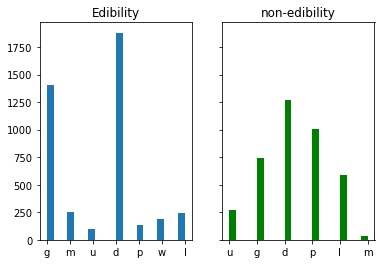

In [97]:
# Visuell representasjon om hvordan spiselighet og ikke-spiselighet er fordelt på habitat.
plt.figure()
fif, axis = plt.subplots(1,2, sharey=True)

axis[0].set_title("Edibility")
axis[1].set_title("non-edibility")

axis[0].hist(mush_e['habitat'], bins=20)
axis[1].hist(mush_p['habitat'], bins=20, color='green')

In [102]:
# list all features of mushrooms
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

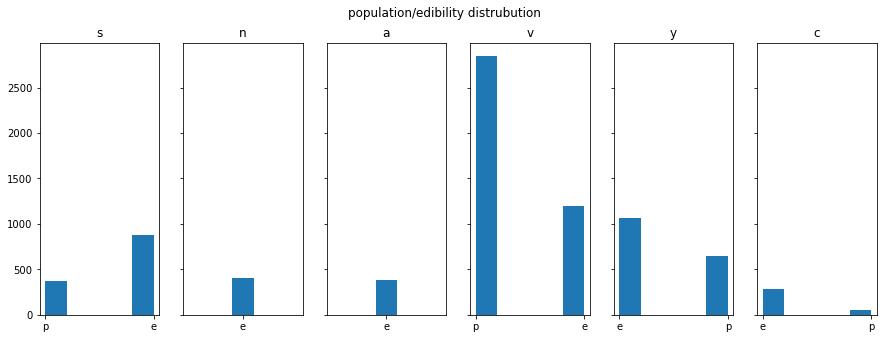

In [105]:
feature = 'population'

fig, axis = plt.subplots(1, len(mushrooms[feature].unique()),sharey=True, figsize=(15,5))
fig.suptitle(f'{feature}/edibility distrubution')

for i, pop in enumerate(mushrooms[feature].unique().tolist()):
    axis[i].set_title(pop)
    axis[i].hist(mushrooms[mushrooms[feature] == pop]['edibility'], bins=5)

##### 5. The data is entirely categorical. Convert each feature to dummy variable.

In [87]:
dum = pd.get_dummies(mushrooms).transpose()
dum.head()

,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
edibility_e,0,1,1,0,1,1,1,1,0,1,...,0,1,0,0,0,1,1,1,0,1
edibility_p,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,1,0
cap-shape_b,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
cap-shape_c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cap-shape_f,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


##### 6. Visualise the space using a similar method to the one we used for the 20 nrewgroups dataset.

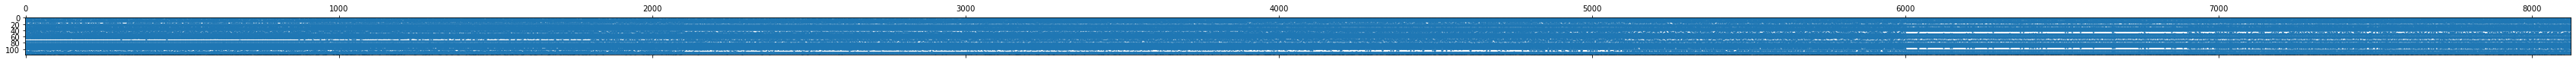

In [111]:

fig = plt.gcf()
fig.set_size_inches(60,200)
#plt.figure(figsize=(200,200))
plt.spy(dum, markersize=1.0)
plt.plot()
plt.show()
